<a href="https://colab.research.google.com/github/Athreya99/Analytics/blob/main/FacebookDataClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gagan Gupta, Manoj Athreya Hallegere, Sanfer Noronha, Edison Nalluri
# 02/24/2023
# COEN 281 with Professor Farooq
# Clustering Assignment
# Dataset: https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo
# Orginal link: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list
!kaggle datasets download -d ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo
!mkdir train
!unzip facebook-live-sellers-in-thailand-uci-ml-repo.zip -d train

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/138k [00:00<?, ?B/s]
100% 138k/138k [00:00<00:00, 64.0MB/s]
Archive:  facebook-live-sellers-in-thailand-uci-ml-repo.zip
  inflating: train/Live.csv          


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
filename = 'train/Live.csv'
df_raw = pd.read_csv(filename)
df_raw = df_raw.drop(['Column1','Column2','Column3','Column4'], axis=1)
print(df_raw.shape)
print(df_raw.columns)
df_raw.sample(n=15, replace=False, random_state=1)

(7050, 12)
Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
5460,614855718638584_726675650789923,video,2/8/2018 1:07,199,515,118,150,44,3,2,0,0
1873,246675545449582_355641404552995,photo,4/5/2013 10:49,71,2,7,71,0,0,0,0,0
3738,134115277150304_154357025126129,photo,7/17/2017 7:11,0,0,0,0,0,0,0,0,0
5712,614855718638584_682610415196447,video,12/22/2017 2:04,41,0,2,41,0,0,0,0,0
5292,614855718638584_776106609180160,video,3/28/2018 1:07,163,1138,200,116,43,3,0,0,1
1038,246675545449582_837986176318513,status,10/31/2015 6:21,1018,10,0,1018,0,0,0,0,0
2751,134115277150304_258328388062325,photo,5/14/2018 3:25,58,1,0,58,0,0,0,0,0
4737,614855718638584_854111134713040,photo,6/12/2018 8:10,25,0,0,24,0,1,0,0,0
6242,819700534875473_977201195792072,photo,4/27/2018 23:27,360,22,10,347,2,5,0,6,0
4076,848451358648417_960356214124597,video,5/10/2018 3:32,1,0,0,1,0,0,0,0,0


In [ ]:
df = df_raw.copy(deep=True)

print(df.shape)
# keep first duplicate row and drop the other duplicates
df = df.drop_duplicates()
print(df.shape)
# drop missing values
df = df.dropna()
print(df.shape)

df = df.drop(['status_id'], axis=1)
df = df.drop(['status_published'], axis=1)
print(df.shape)

num_columns = len(df.columns)

df = df.apply(preprocessing.LabelEncoder().fit_transform)
# for column in df.columns:
#   df[column] = (df[column] - df[column].mean()) / df[column].std()
  # df[column]=(df[column]-df[column].min())/(df[column].max()-df[column].min())

print("-------------------------------")
# count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum
print(df.describe(include='all'))
print("-------------------------------")
# 95th percentile of field_A
print(df.quantile(0.95))
print("-------------------------------")
# num non-null vals, data types of columns, and the memory usage of df
print(df.info())
print("-------------------------------")
print(df.shape)

(7050, 12)
(6999, 12)
(6999, 12)
(6999, 10)
-------------------------------
       status_type  num_reactions  num_comments   num_shares    num_likes  \
count  6999.000000    6999.000000   6999.000000  6999.000000  6999.000000   
mean      1.708958     163.509358     91.221032    33.214173   151.715102   
std       0.943998     230.195829    211.516476    89.116105   220.998327   
min       0.000000       0.000000      0.000000     0.000000     0.000000   
25%       1.000000      17.000000      0.000000     0.000000    17.000000   
50%       1.000000      58.000000      4.000000     0.000000    57.000000   
75%       3.000000     216.000000     22.000000     4.000000   182.000000   
max       3.000000    1066.000000    992.000000   500.000000  1043.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  
count  6999.000000  6999.000000  6999.000000  6999.000000  6999.000000  
mean     11.601372     0.957708     0.630376     0.217603     0.106444  
std      31

In [ ]:
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(df)
  distortions.append(kmeanModel.inertia_)

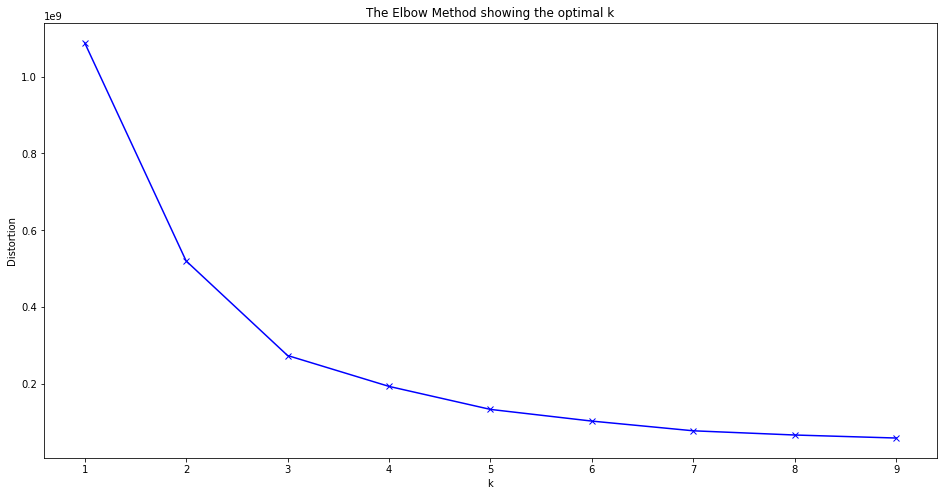

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
k = 3
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(df)
label = kmeanModel.predict(df)
print(label)
u_labels = np.unique(label)
print(u_labels)

[2 0 0 ... 0 0 0]
[0 1 2]


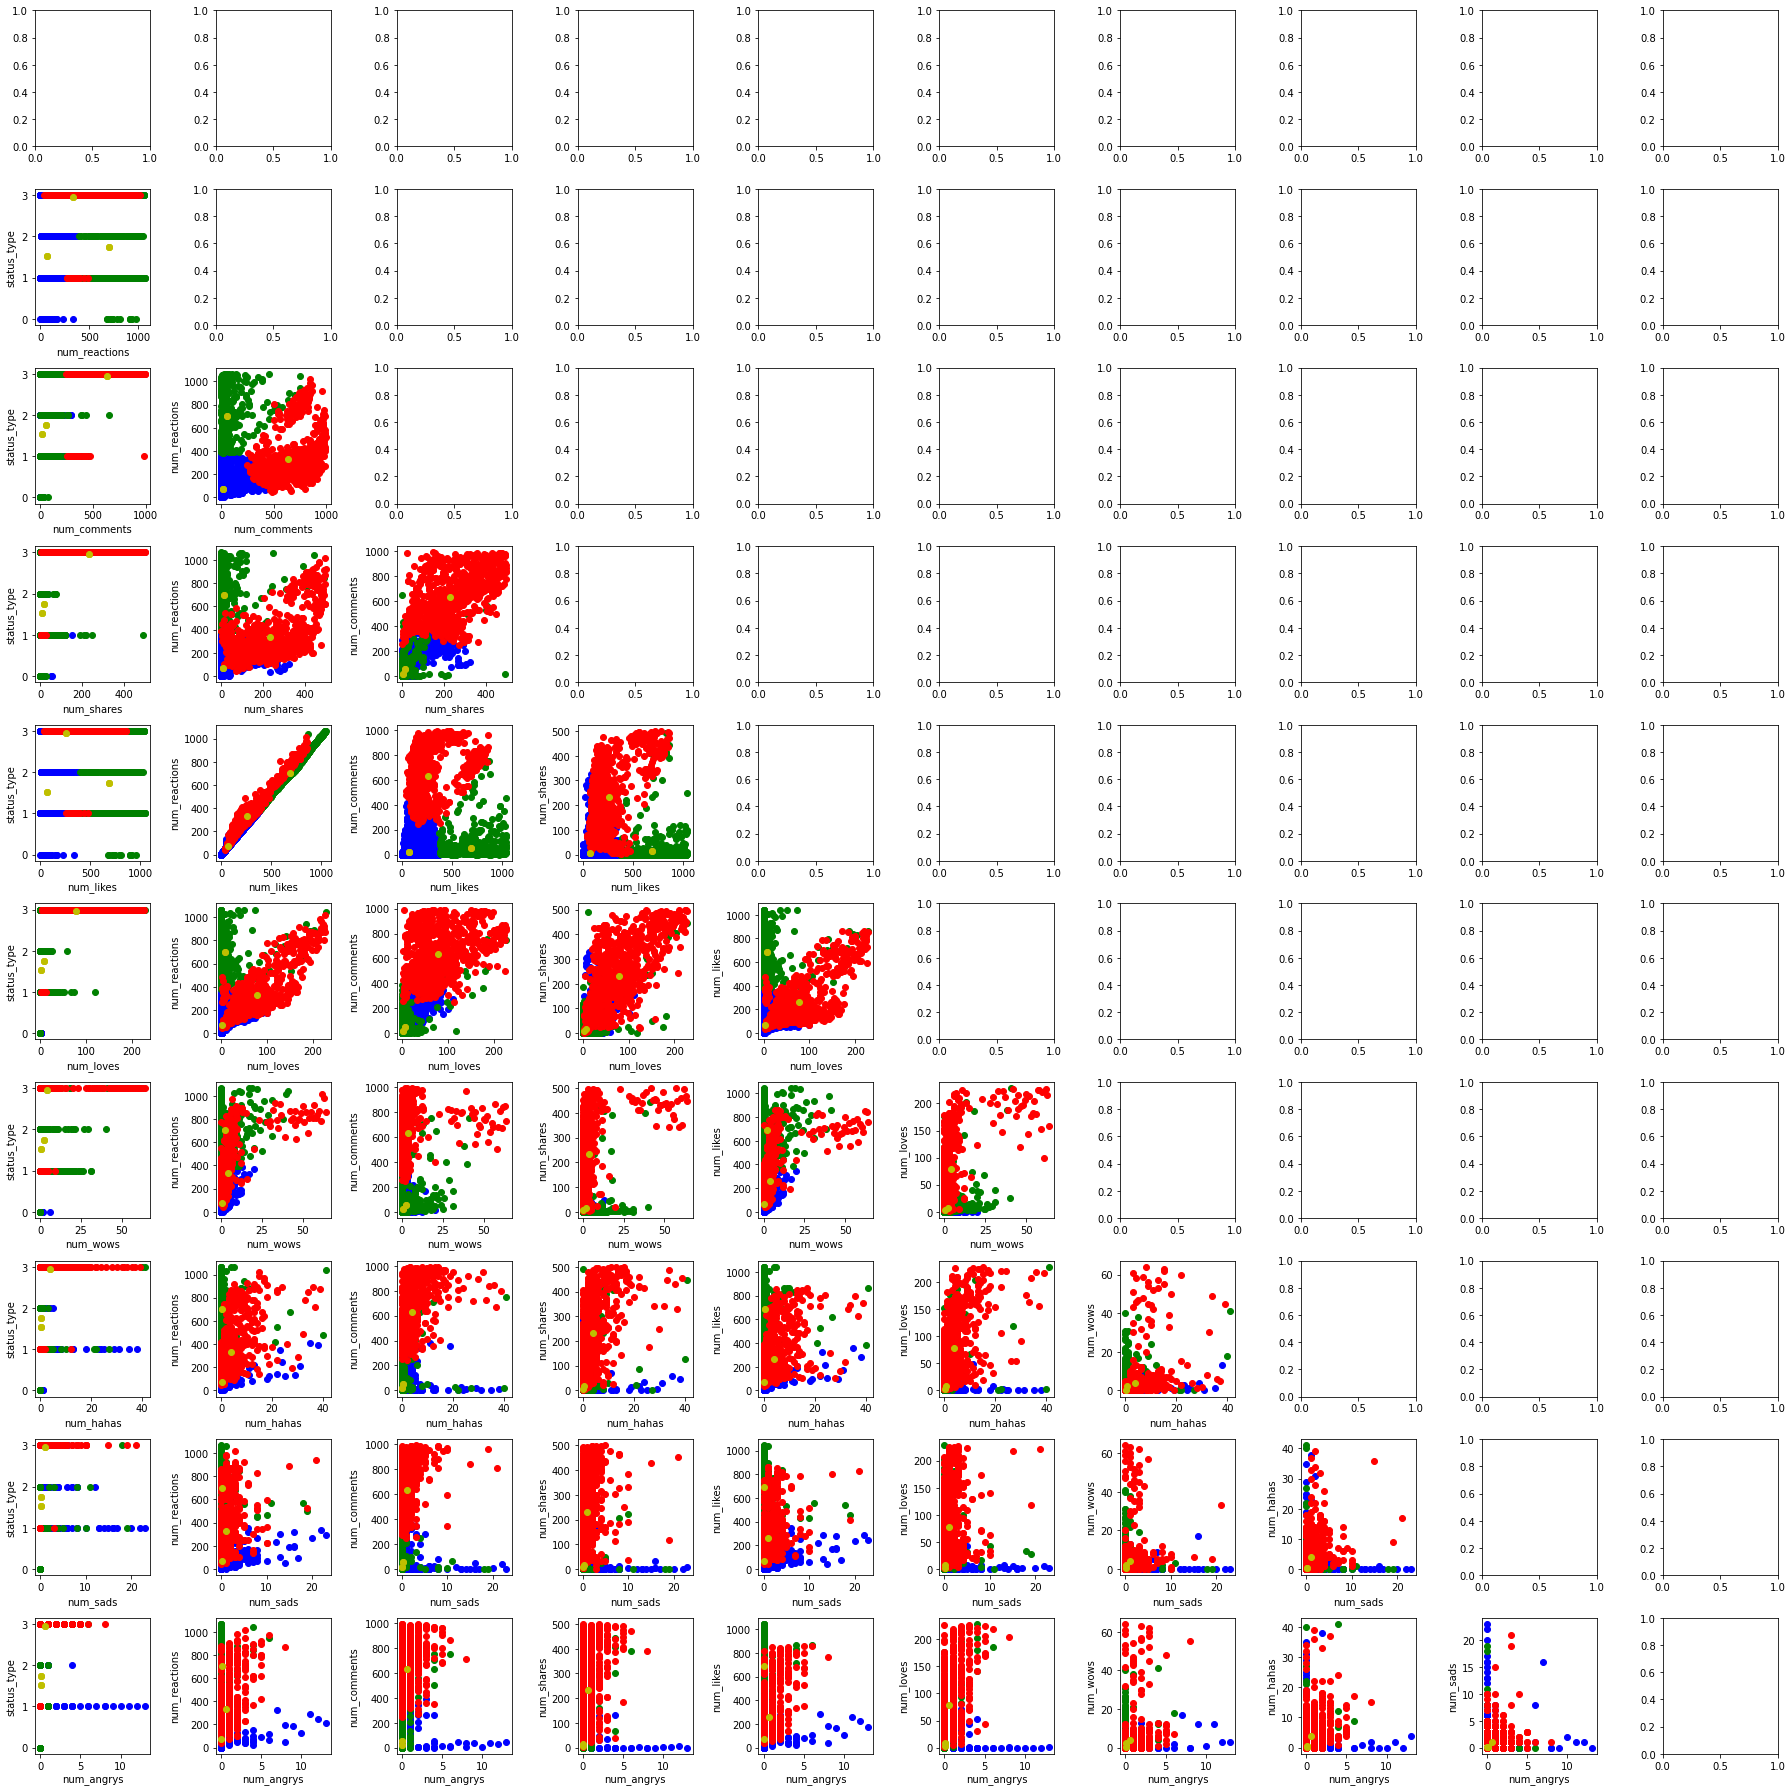

In [ ]:
fig, axs = plt.subplots(num_columns, num_columns)
fig.set_size_inches(25, 25)
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'w']
for x_col in range(0, num_columns):
  for y_col in range(0, x_col):
    for i in u_labels:
      axs[x_col, y_col].scatter(df.iloc[label == i , x_col] , df.iloc[label == i , y_col], color=colors[i])
      axs[x_col, y_col].scatter(kmeanModel.cluster_centers_[:, x_col], kmeanModel.cluster_centers_[:, y_col], color='y')
      axs[x_col, y_col].set_xlabel(df.columns[x_col])
      axs[x_col, y_col].set_ylabel(df.columns[y_col])
fig.tight_layout()

# **Reflection**

---

###**Development and Interpretation of model results**
The dataset was first pulled and cleaned from kaggle. Clenaing included removing duplicates (51 rows dropped) and any rows with missing data (0 rows dropped) leaving 6999 rows. The status_id and status_published columns were also dropped as the status_id was just a row identifier and status_published was a time and date (10 columns left). The status_published could be split into two columns like year and hour of the day but that has not been done here. The data was then label encoded for the status_type column. Standardization (mean or min-max) of the data causes the elbow curve to not have a clear elbow to determine the k value off of as k-means is highly sensitive to preprocessing. The k determined from the elbow graph was 3 and the grid of plots was made to visualize what the k-means clusters predicted clusters meant in relation to the dataset. Since the data is from the Facebook platform, it is important to view the data from the perspective of the consumer and how they engage/interact with posts. From the graphs we can see that not all of the combinations of axes represent the clusters and centroids in a meaningful way. Some of the more informational plots in the grid include (x-axis, y-axis):

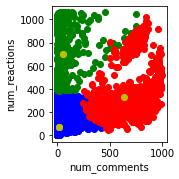
*   (num_comments, num_reactions)
  *   The clusters are clear
    *   Blue: Low interaction post hence low comment count and low reaction count
    *   Green: High interaction via reaction but comment count is low
    *   Red: Overall high interaction with high comment count

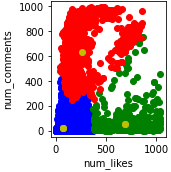
*   (num_likes, num_comments)
  *   The clusters are clear
    *   Blue: Low interaction post hence low comment count and low reaction count
    *   Green: High interaction via like but comment count is low
    *   Red: High interaction with high comment count

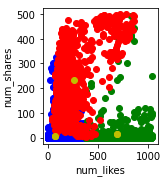
*   (num_likes, num_shares)
  *   The clusters are less clear – red and blue merged
    *   Red/Blue: Lower like count but high variability.
    *   Green: High interaction via like count with low share count

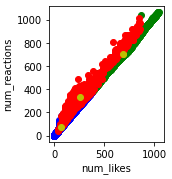
*   (num_likes, num_reactions)
  *   Likes make up most of the reactions hence the linear nature of the graph
  *   Likes, comments, and shares are the main ways consumers interact with a post

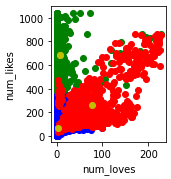
*   (num_loves, num_likes)
  *   The clusters aren’t very clear
    *   Blue: Low interaction post hence low like and love count
    *   Green: High interaction via like but love count is relatively low
    *   Red: Higher love count when the like count is higher (like count directly relates to overall post interaction), cluster best fit line vaguely shows the linear growth of a viral post

---

###**Learnings taken away from this**
The dataset from the “Facebook Live Sellers in Thailand Data Set” shows social media consumer engagement and couple of things can be learnt directly from the data. The most common ways consumers interact with posts are likes, comments, and shares and likes are the most common reaction by far. The clusters tended to indicate the level and type of engagement a group has. The blue cluster mostly ended up indicating lower engagement with the cluster sitting near the bottom left corner of most plots. The red and green clusters showed groups with different variations of high consumer engagement. The green clusters had high reaction/like count, low comment count, and low share count while the red clusters had high comment count, medium/high share count, and a wider spread of love reactions.

---

###**Ways to improve the model**
When trying to standardize (mean or min-max) the data, the elbow curve did not have a clear elbow to determine the k value. This could be because k-means is highly sensitive to preprocessing or that the elbow curve only looks at global clustering characteristics. Using the elbow curve to pick the number of clusters isn’t the best solution and further testing with the silhouette and the gap statistic methods is needed. K-means seems to be highly sensitive to preprocessing and maybe another means of clustering like hierarchical, density-based, spectral, or fuzzy clustering could be used. As the data was label encoded for the status_type column, the encoding wasn’t kept track of in this implementation so the data can’t be re-labeled. Luckily none of the clusters were particularly separated by status_type but this is a possibility with additional preprocessing.

---

